In [1]:
import h5py
import numpy as np
import matplotlib.pylab as plt
import cv2
from scipy import signal, ndimage

#import cv2
#!python -m pip install opencv-python==4.1.2.30

#conda install -c menpo opencv

In [2]:
#Gain access to the data.
#Note: This does *not* load the entire data set into memory.
#dset = h5py.File("old_dataset_test_do_not_use.h5","r")
dset = h5py.File("dataset_test.h5","r")


#Open dataset file, read only
#Access to the input data
RGB = dset["RGB"]
NIR = dset["NIR"]
#The data has the following size
np.shape(RGB)

(3, 10980, 10980, 3)

In [3]:
np.seterr(divide='ignore', invalid='ignore')

def calc_NDVI(NIR, RED):
    NDVI = (NIR.astype(float)-RED.astype(float))/(NIR+RED)
    return NDVI

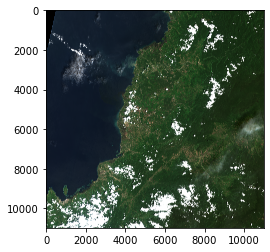

In [4]:
testimage = RGB[0]
plt.imshow(testimage)
plt.show()

In [25]:
subset = testimage[7000:10000, 0:3000]
print(subset)

[[[ 16  26  40]
  [ 15  25  40]
  [ 15  26  41]
  ...
  [ 20  32  43]
  [ 18  29  40]
  [ 19  30  42]]

 [[ 16  25  40]
  [ 15  25  41]
  [ 15  25  41]
  ...
  [ 22  32  44]
  [ 20  28  39]
  [ 19  29  39]]

 [[ 15  24  41]
  [ 13  25  41]
  [ 15  26  40]
  ...
  [ 23  32  43]
  [ 18  30  41]
  [ 19  32  40]]

 ...

 [[ 52  93  59]
  [ 56 102  61]
  [ 53  99  60]
  ...
  [173 168 149]
  [168 158 144]
  [172 170 167]]

 [[ 49  94  61]
  [ 53  99  58]
  [ 53  97  59]
  ...
  [137 147 182]
  [135 157 231]
  [157 198 254]]

 [[ 46  89  58]
  [ 49  95  57]
  [ 52  96  60]
  ...
  [155 224 253]
  [185 255 255]
  [232 254 255]]]


In [26]:
np.shape(subset)

(3000, 3000, 3)

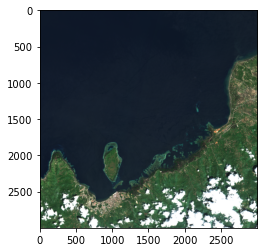

In [27]:
plt.imshow(subset)
plt.show()

In [5]:
testimage

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 22,  41,  17],
        [ 21,  38,  15],
        [ 18,  38,  13]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,  40,  18],
        [ 20,  36,  14],
        [ 19,  39,  15]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 14,  29,  12],
        [ 17,  31,  10],
        [ 17,  37,  14]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 21,  36,  10],
        [ 27,  42,  15],
        [ 25,  46,  16]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 23,  41,  12],
        [ 26,  45,  18],
        [ 24,  43,  16]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 25,  42,  17],
        [ 24,  43,  16],
        [ 23,  39,  12]]

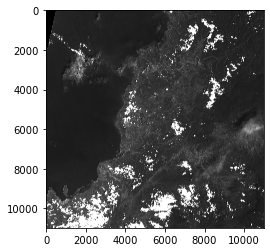

In [6]:
grayscale = cv2.cvtColor(testimage, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap = 'gray')
plt.show()

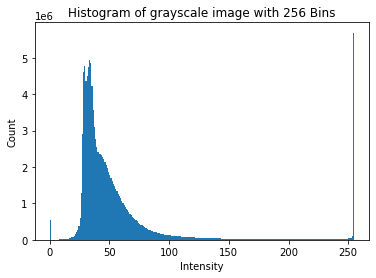

In [7]:
plt.hist(grayscale.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.title('Histogram of grayscale image with 256 Bins')
plt.show()

In [8]:
def window_level_function(image, window, level):
    image = image.astype(np.double)  #Convert the input image into double format
    minimum = np.min(image[:]) #Minimum intensity value in the image
    maximum = np.max(image[:]) #Maximum intensity value in the image
    
    #Clip or remove everything before or after the window boundaries
    image = np.clip(image, (level-(window/2)), (level+(window/2))) 
    #Everything below left limit becomes black
    #Everyting above right limit becomes white
    
    m = (maximum-minimum)/window; #Slope of the window level transfer function
    b = maximum - (m * (level + (window/2))) #y-intercept of the window level transfer function

    image = m * image + b #The remaining, non-scaled values are adjusted by applying a linear transformation
    return image.astype(np.uint8) #Convert output to unsigned 8-bit integer and return

In [9]:
#Call function above
#window = 10
#level = 250
modified_image1 = window_level_function(grayscale, 50, 100)
modified_image2 = window_level_function(grayscale, 10, 250)


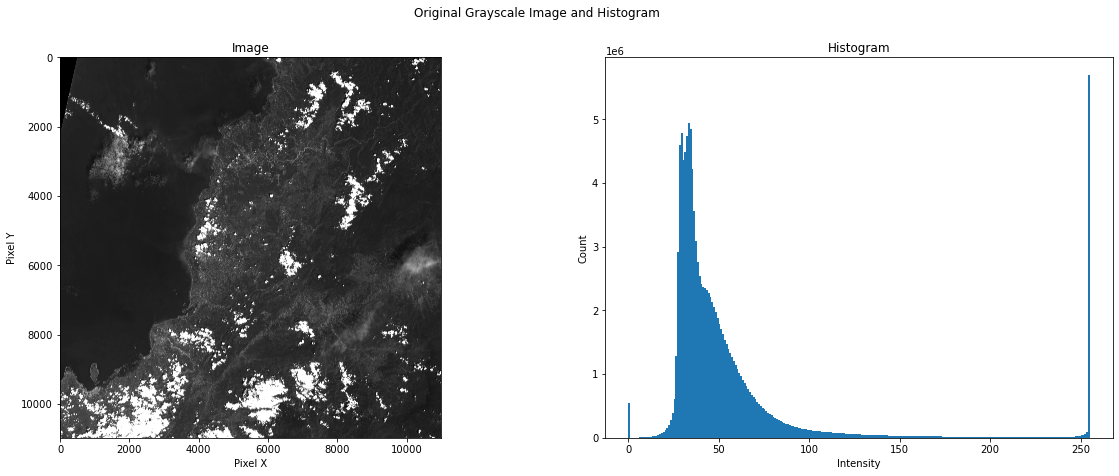

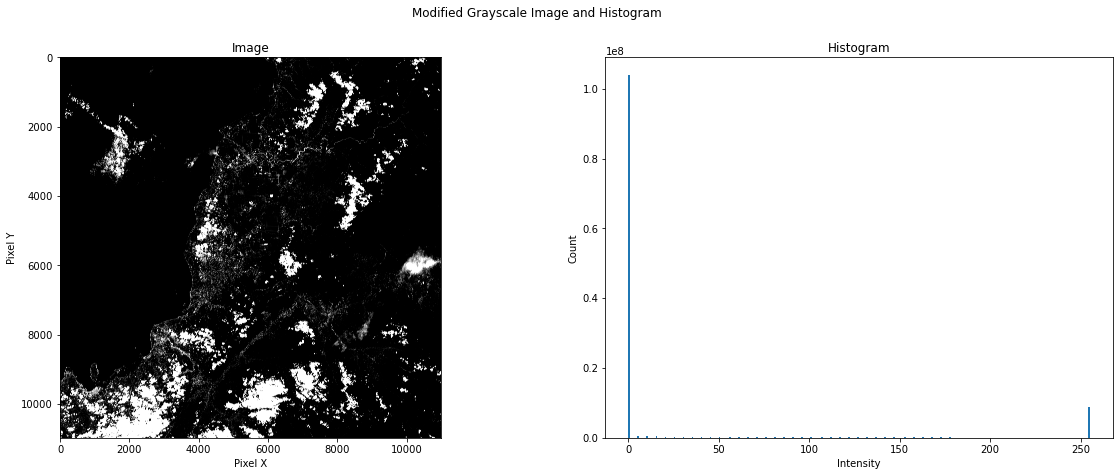

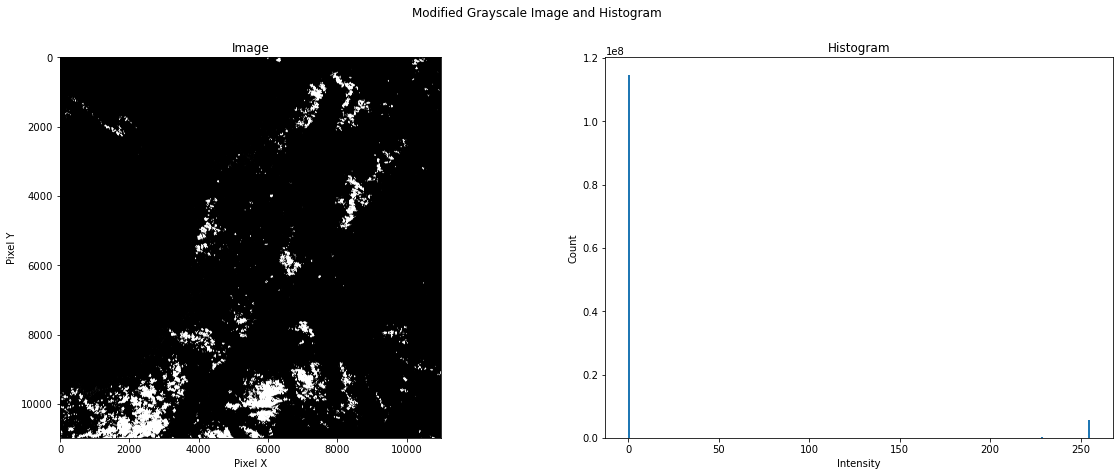

In [10]:
plt.subplots(1, 2, figsize=(20, 7))
plt.suptitle('Original Grayscale Image and Histogram')
plt.subplot(1,2,1)
plt.imshow(grayscale, cmap = 'gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Image');
plt.subplot(1,2,2)
plt.hist(grayscale.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Histogram'); 
plt.show()

plt.subplots(1, 2, figsize=(20, 7))
plt.suptitle('Modified Grayscale Image and Histogram')
plt.subplot(1,2,1)
plt.imshow(modified_image1, cmap = 'gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Image');
plt.subplot(1,2,2)
plt.hist(modified_image1.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Histogram'); 
plt.show()

plt.subplots(1, 2, figsize=(20, 7))
plt.suptitle('Modified Grayscale Image and Histogram')
plt.subplot(1,2,1)
plt.imshow(modified_image2, cmap = 'gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Image');
plt.subplot(1,2,2)
plt.hist(modified_image2.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Histogram'); 
plt.show()



$$ G(x,y) = \frac{1}{{2 \pi} \sigma^2} exp\left( - \frac{(x-\mu_x)^2 + (y-\mu_y)^2}{2 \sigma^2} \right) $$

In [11]:
def gaussian_kernel(sigma, kernel_size):    
    gauss_kernel = np.zeros((kernel_size, kernel_size)) #Declare an empty matrix of zeros based on the kernel size
    indices = [*range(-int(np.floor(kernel_size/2)), int(np.floor(kernel_size/2))+1)] #Get the neighbouring indices
    constant = 1/(2*(np.pi)*sigma**2) #Constant term in the above equation
    
    #For all indices in both dimensions
    for i in range(kernel_size):
        for j in range(kernel_size):
            #Evaluate the 2D Gaussian function to obtain the Kernel
            gauss_kernel[i, j] = constant*(np.exp(-((indices[i])**2+(indices[j])**2)/(2*sigma**2)))
        
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel.ravel()) #Normalize the kernel by dividing by the sum of elements
    
    return gauss_kernel

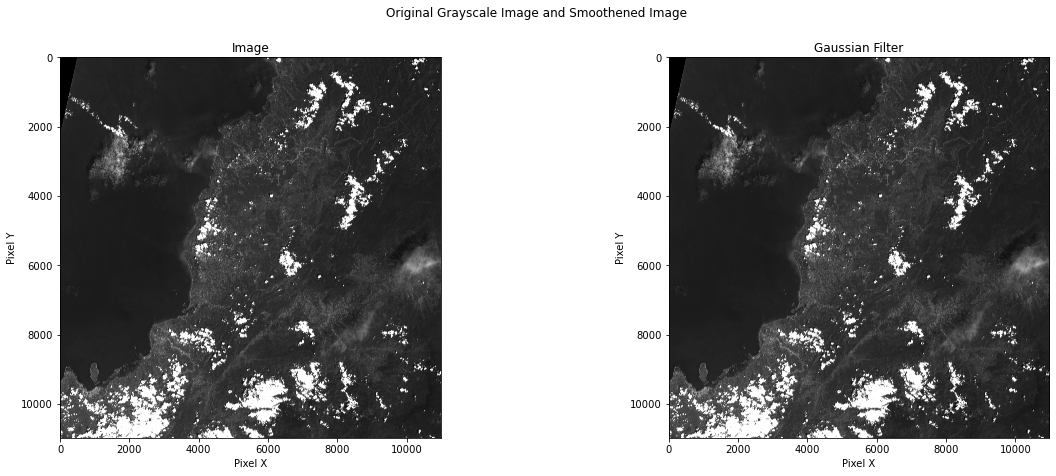

In [15]:
#Time-consuming
sigma = 5
kernel = 5
gauss = gaussian_kernel(sigma, kernel)

smoothened_image = signal.convolve2d(grayscale, gauss, boundary='pad', mode='same')
plt.subplots(1, 2, figsize=(20, 7))
plt.suptitle('Original Grayscale Image and Smoothened Image')
plt.subplot(1,2,1)
plt.imshow(grayscale, cmap = 'gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Image');
plt.subplot(1,2,2)
plt.imshow(smoothened_image, cmap = 'gray')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Gaussian Filter'); 
plt.show()

def equalize(image):
    '''Given an image, equalize the histogram to be easily visualized.
    
    This code is based on this blog post: http://www.janeriksolem.net/histogram-equalization-with-python-and.html
    
    To learn more about histogram equalization, see: https://en.wikipedia.org/wiki/Histogram_equalization
    '''
    
    # Compute CDF
    hist, bins = np.histogram(image.ravel())
    cdf = np.cumsum(hist)
    
    # Now we do linear interpolation
    resampled = np.interp(image.flatten(), bins[:-1], cdf)
    
    # Resample
    new_image = resampled.reshape(image.shape)
    
    return new_image

#Try using the Fourier transform
dft1 = np.fft.fftshift(np.fft.fft2(grayscale)) #Discrete Fourier transform
mag1 = np.abs(dft1) #Magnitude
#Reconstruct image using magnitude
new_image_mag1 = np.fft.ifft2(np.fft.fftshift(mag1))
new_image_mag1 = np.abs(new_image_mag1)
new_image_mag1 = equalize(new_image_mag1);
phase1 = np.angle(dft1) #Phase (complex)
#Reconstruct image using phase
new_image_phase1 = np.fft.ifft2(np.fft.fftshift(phase1))
new_image_phase1 = np.abs(new_image_phase1)
new_image_phase1 = equalize(new_image_phase1)
#Plot everything side by side
plt.subplots(1, 3, figsize=(30, 10))
plt.suptitle('Separating image into phase and magnitude')
plt.subplots_adjust(top=0.95)
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray');
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(new_image_mag1, cmap='gray');
plt.title('Magnitude Reconstruction')
plt.subplot(1, 3, 3)
plt.imshow(new_image_phase1, cmap='gray');
plt.title('Phase Reconstruction')
plt.show()





Text(0.5, 1.0, 'Original Image Sobel filtered')

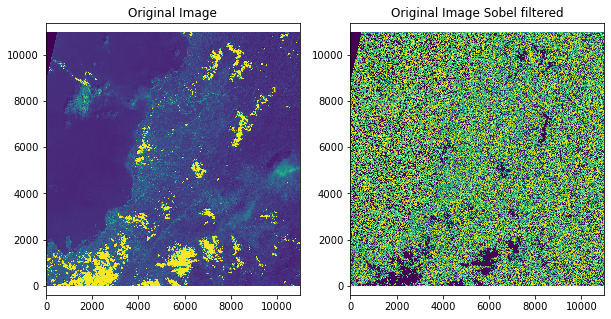

In [18]:
#Try using the Sobel filter from scipy

from scipy import ndimage

ImageSobelFx=ndimage.sobel(grayscale,axis=0, mode='constant')
ImageSobelFy=ndimage.sobel(grayscale,axis=1, mode='constant')
ImageSobelF=np.hypot(ImageSobelFx, ImageSobelFy)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.pcolormesh(np.flipud(grayscale[:,:]))
plt.axis('equal') #this makes the image square
plt.title('Original Image')
plt.subplot(122)
plt.pcolormesh(np.flipud(ImageSobelF[:,:]))
plt.axis('equal') #this makes the image square
plt.title('Original Image Sobel filtered')





In [ ]:
ndvi = calc_NDVI(NIR[0,:,:], RGB[0,:,:,0])

plt.imshow(ndvi) #, cmap = plt.cm.reds)
plt.set_cmap('Reds')
plt.show()

In [ ]:
plt.imshow(RGB[0], cmap='gray')

In [ ]:
plt.hist(RGB[0].ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.title('Histogram with 256 Bins')
plt.show()

In [ ]:
from skimage import data, io, filters

#image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(rgb2gray(RGB[0]))
io.imshow(edges)
io.show()


In [ ]:
#RGB[0,:,:,0] - 

In [ ]:
#np.shape(NIR)

In [ ]:
#The dataset contains 3 images with a size of 10980x10980.
#For example, we can also display the first image.
plt.imshow(RGB[0])
plt.show()
# Please note that this will load the entire image into memory.

In [ ]:
#Let's create an input-label pair:
#first the input by concatenating the RGB and NIR channels.
input_image = np.concatenate([RGB,np.expand_dims(NIR,axis=-1)],axis=-1)
print(np.shape(input_image))

In [ ]:
GT = dset["GT"]
#The array GT contains the values 0 = background, 1 = palm oil and 99 = no data.

#Let's visualize this array.
#Note that 99 is assigned to 3 for visualization only.
#-> 99 (3) means that there is no data.
first_gt_image = np.where(GT[0]==99,3,GT[0])
plt.imshow(first_gt_image)
plt.show()

In [ ]:
#You can see that palm oil trees are also assigned to the parts that are occluded by clouds.
#Therefore, wherever there is a cloud, we assign the label 2.
CLD = dset["CLD"]
cloud_positions = np.where(CLD[0] > 10)
first_gt_image[cloud_positions] = 2
# lets now print the complete label image
plt.imshow(first_gt_image)
plt.show()

In [ ]:
#The label image and the input image still do not match perfectly.
#There are parts in the input image that do not contain data.
#We remove them from the input:
idx = np.where(np.max(input_image[0], axis=-1) == 0)
first_gt_image[idx] = 3
plt.imshow(first_gt_image)
plt.show()

In [ ]:
#Finally we can draw a small input window and the corresponding label data
f, axarr = plt.subplots(ncols=3, nrows=1)
axarr[0].imshow(input_image[0,384:628,384:628, :3]) #RGB
axarr[1].imshow(input_image[0,384:628,384:628, -1]) #NIR
axarr[2].imshow(first_gt_image[384:628,384:628])
plt.show()

In [ ]:
from skimage import data
from skimage.exposure import histogram
coins = data.coins()
hist, hist_centers = histogram(coins)

In [ ]:
from skimage import data, io, filters

image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

